# Статистика, прикладной поток
## Практическое задание 5

В данном задании вы исследуете некоторые свойства доверительных интервалов и байесовских оценок.

**Правила:**

* Дедлайн **25 ноября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[applied] Фамилия Имя - задание 5"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `5.N.ipynb` и `5.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  5 баллов **O2**
* Задача 2 -  5 баллов **O2**
* Задача 3 -  5 баллов **O2**
* Задача 4 -  5 баллов **O2**
* Задача 5 -  7 баллов **O2**
* Задача 6 -  7 баллов **O2**
* Задача 7 -  7 баллов **O2**
* Задача 8 -  10 баллов **O3**
* Задача 9 -  6 баллов **O2**

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
warnings.filterwarnings("ignore")

%matplotlib inline

## Доверительные интервалы

__________________
### Задача 1.
В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. 

Чтобы не плодить код, напишите следующую функцию (см. ниже). Пример построения есть в ноутбуке по `matplotlib`.

In [471]:
def draw_confidence_interval(
        left,  # левая граница интервала
        right,  # правая граница интервала
        title,
        estimation=None,  # если задана, то рисуется график оценки
        sample=None,  # если задано, то рисуются точки выборки
        ylim=(None, None), # ограничение по оси y
    ):
    time = np.arange(1, len(left) + 1)
    plt.figure(figsize=(8, 8))
    plt.title(title)
    plt.ylim(ylim)
    if (estimation is not None):
        plt.plot(time, estimation, label='estimation')
    if (sample is not None):    
        plt.scatter(time, sample, alpha =0.2, label='sample')
    plt.fill_between(time, left, right, alpha=0.5, label='interval')
    plt.legend()
    plt.show()

Рассмотрим следующие ситуации:

1. Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

2. Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в параметрической модели $U[0, \theta]$ на основе статистики $X_{(n)}$.

Для каждой ситуации из перечисленных выше сгенерируйте выборку $X_1, ... X_{100}$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок вида $X_1, ... X_i$, $1 \le i \le 100$.

Постройте графики зависимости верхних и нижних границ интервала от размера выборки, используя написанную функцию. Нужно нанести на график точки выборки.
Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.


**Решение**

Точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$:
$$(\overline{X}-z_{\frac{1+\alpha}{2}}\cdot \frac{1}{\sqrt{n}}, \overline{X}+z_{\frac{1+\alpha}{2}}\cdot \frac{1}{\sqrt{n}})$$

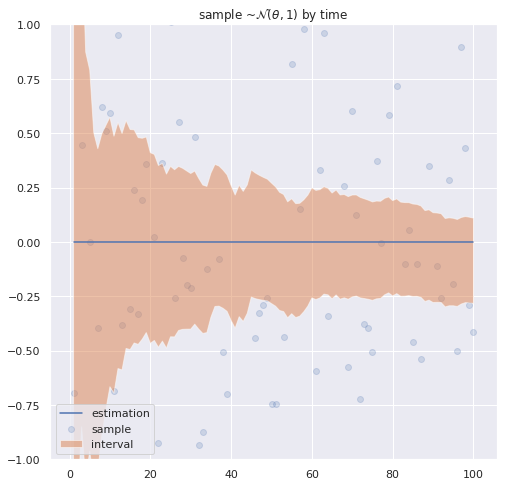

In [472]:
grid = np.arange(1, 101)
alpha = 0.95

sample = sps.norm().rvs(size = 100)

cum_mean = sample.cumsum()/grid

left = cum_mean - sps.norm.ppf((1 + alpha) / 2)/np.sqrt(grid)
right = cum_mean + sps.norm.ppf((1 + alpha) / 2)/np.sqrt(grid)

draw_confidence_interval(left, right, 
                r'sample ~$\mathcal{N}(\theta, 1)$ by time', 
                         estimation=np.zeros(len(left)),
                            sample=sample, ylim=(-1, 1))

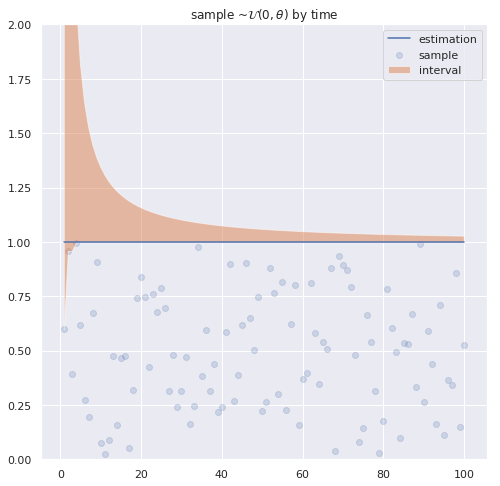

In [473]:
sample = sps.uniform.rvs(size=100)

cum_max = np.maximum.accumulate(sample)
left = cum_max
right = cum_max/(1-alpha)**(1/grid)

draw_confidence_interval(left, right, 
             r'sample ~$\mathcal{U}(0, \theta)$ by time', 
                         estimation=np.ones(len(left)),
                         sample=sample, ylim=(0,2))


**Вывод:** Мы видим, что для обеих распределений их точные доверительные интервалы с ростом выборки сходятся
к значению оцениваемого параметра. Причем интервал для $U[0, \theta]$ сходится гораздо быстрее, так как скорость сходимости у него степенная, в отличие от нормального, сходимость у которого $~\frac{1}{n^{(1/2)}}$

__________________
### Задача 2.
Аналогично задаче 1 сгенерируйте выборку $X_1, ... X_{100}$ из распределения $\Gamma(3, 2)$ и постройте доверительные интервалы для следующих случаев:

* точный асимптотический доверительный интервал в параметрической модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно;
* точный асимптотический доверительный интервал для $\theta$ в параметрической модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки наносить на график не нужно. 

**Решение:**
    
* точный асимптотический доверительный интервал в парам. модели $\Gamma(\theta, \beta)$ при известном $\beta$ :
$$
(\frac{\beta}{\overline{X}} - \sqrt{\frac{\beta}{n}} \cdot \frac{z_{\frac{1+\alpha}{2}}}{\overline{X}},
 \frac{\beta}{\overline{X}} + \sqrt{\frac{\beta}{n}} \cdot \frac{z_{\frac{1+\alpha}{2}}}{\overline{X}})
$$

* точный асимптотический доверительный интервал для $\theta$ в парам. модели $\Gamma(\theta, \beta)$, $\beta$ неизвестно.

$$
\left(
\frac{\overline{X}}{S^2} - \frac{z_{\frac{1+\alpha}{2}} \sigma\left(\frac{\overline{X}}{S^2}, \frac{\overline{X}^2}{S^2}\right)}{\sqrt{n}},
\frac{\overline{X}}{S^2} + \frac{z_{\frac{1+\alpha}{2}} \sigma\left(\frac{\overline{X}}{S^2}, \frac{\overline{X}^2}{S^2}\right)}{\sqrt{n}}
\right)
$$

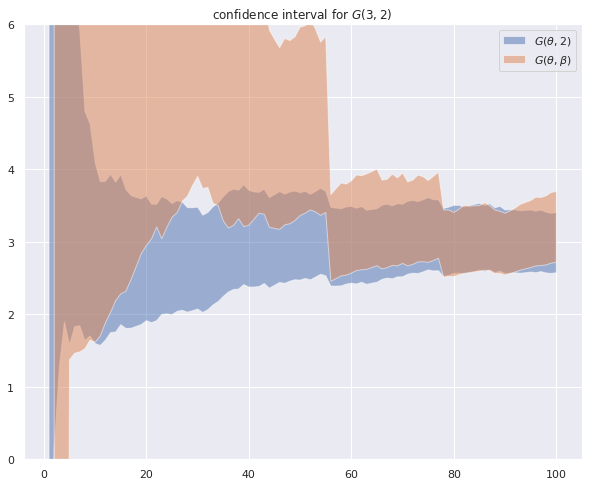

In [478]:
sample = sps.gamma(a=2, scale = 1/3).rvs(size=100)

cum_mean = sample.cumsum()/grid

Z = sps.norm.ppf((1 + alpha) / 2)

left1 = (2 - Z*np.sqrt(2/grid)) / cum_mean
right1 = (2 + Z*np.sqrt(2/grid)) / cum_mean

estimation = cum_mean / ((sample**2).cumsum()/grid - cum_mean**2)

variance = estimation * np.sqrt(2 - 3/(cum_mean*estimation))

left2 = estimation - Z*variance /np.sqrt(grid)
right2 = estimation + Z*variance /np.sqrt(grid)

plt.figure(figsize=(10, 8))

plt.title(r"confidence interval for $G(3, 2)$")
plt.ylim((0,6))

plt.fill_between(grid, left1, right1, alpha=0.5, 
                 label = r'$G(\theta, 2)$')

plt.fill_between(grid, left2, right2, alpha=0.5, 
                 label = r'$G(\theta, \beta)$')

plt.legend()
plt.show()

Сравните полученные интервалы.

**Вывод:** Здесь мы видим, что оба наших интервала с ростом выборки лучше и лучше начинают оценивать параметр, что подверждает теорические свойства этих асимптотических дов. интервалов.
Но при этом мы можем видеть, что интервал для $G(\theta, 2)$, то есть при известном втором параметре гораздо устойчивей, и гораздо "равномерней" сходится, нежели интервал, где второй параметр неизвестен.

__________________
### Задача 3.
Аналогично задаче 1 сгенерируйте выборку $X_1, ... X_{100}$ из стандартного распределения Коши и постройте доверительные интервалы для следующих случаев

* точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$;
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя выборочную медиану;
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя асимптотически эффективную оценку.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки нужно нанести на график. 

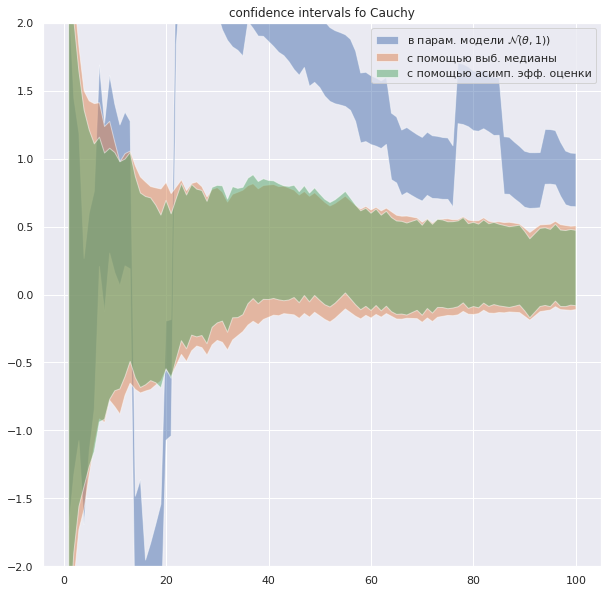

In [489]:
grid = np.arange(1, 101)
alpha = 0.95

sample = sps.cauchy.rvs(size=100)

cum_mean = sample.cumsum()/grid
cum_median = np.array([np.median(sample[:i+1]) for i in range(len(sample))])


quantile = sps.norm.ppf((1 + alpha) / 2)

#1ый доверительный интервал
left1 = cum_mean - quantile/np.sqrt(grid)
right1 = cum_mean + quantile/np.sqrt(grid)

#2й доверительный интервал
left2 = cum_median - np.pi*quantile/(2*np.sqrt(grid))
right2 = cum_median + np.pi*quantile/(2*np.sqrt(grid))

#3ий доверительный интервал
newtor_iter = list()
for i in range(100):
    med = cum_median[i]
    numerator = ((sample[:i+1] - med)/(1 + (sample[:i+1] - med)**2)).sum()
    denominator=((1-(sample[:i+1]-med)**2)/(1+(sample[:i+1]-med)**2)**2).sum()
    newtor_iter.append(numerator/denominator)

newtor_iter = np.array(newtor_iter)    

left3 = cum_median - newtor_iter - quantile*np.sqrt(2/grid)
right3 = cum_median - newtor_iter + quantile*np.sqrt(2/grid)


plt.figure(figsize=(10, 10))

plt.title("confidence intervals fo Cauchy")
plt.ylim((-2, 2))

plt.fill_between(grid, left1, right1, alpha=0.5, 
                label=r'в парам. модели $\mathcal{N}(\theta, 1))$')
plt.fill_between(grid, left2, right2, alpha=0.5, 
                label='с помощью выб. медианы')
plt.fill_between(grid, left3, right3, alpha=0.5, 
                label='с помощью асимп. эфф. оценки')


plt.legend()
plt.show()

Сравните полученные интервалы.

**Вывод:** Мы можем видеть, что любой произвольный интервал, какой нам вздумается, не подойдет под оценку, например как в нашем случае с распределением Коши мы можем видеть, что интервал, используемый для модели $\mathcal{N}(\theta, 1)$ нам совершенно не подходит - он ни к чему не сходится, хотя бы потому что у него нет матожидания. Кроме того мы сравнили интревалы, полученные из медианы, и из асимп. эфф. оценки, которую мы нашли с помощью итерации в методе Ньютона из оценки для медианы. Можем видеть, что в принципе ничего особенного не поменялось, видимо существенные различия появляются на больших выборках, но тем не менее иногда даже на нашей выборке асимптотически эфф. дов. интервал все-таки немного более узкий, чем интервал, полученный с помощью медианы.

__________________
### Задача 4.
Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную область для параметра $\theta = (a, \sigma)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения.

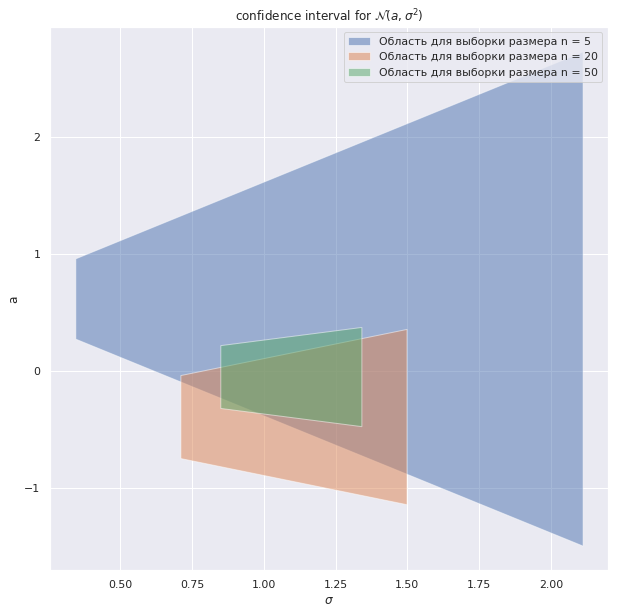

In [96]:
# функция доверительной области для выборки из нормального
def confidence_region(sample):
    S2 = (sample**2).mean() - (sample.mean())**2
    left_sigma = ((n * S2) / sps.chi2(n-1).ppf((1+alpha**0.5)/2)) ** 0.5
    right_sigma = ((n * S2) / sps.chi2(n-1).ppf((1-alpha**0.5)/2)) ** 0.5
    
    sigmas = np.linspace(left_sigma,  right_sigma, 500)
    
    quantile = sps.norm().ppf((1 + alpha**0.5) / 2)
    
    left_a = sample.mean() - sigmas *  quantile / (n ** 0.5)
    right_a = sample.mean() + sigmas *  quantile / (n ** 0.5)
    
    return (sigmas, left_a, right_a)


ns = [5, 20, 50]


plt.figure(figsize=(10, 10))
plt.title(r"confidence interval for $\mathcal{N}(a, \sigma^2)$")

plt.xlabel(r"$\sigma$")
plt.ylabel(r"a")

for n in ns:
    sample = sps.norm.rvs(size=n)
    
    sigmas, left_a, right_a = confidence_region(sample)
    
    plt.fill_between(sigmas, left_a, right_a, alpha=0.5,
                     label="Область для выборки размера n = {}".format((n)))
    
plt.legend()    
plt.show()    

**Вывод:** Здесь мы можем видеть, что площадь доверительной области уменьшается с ростом размера выборки, и тем не менее в любом случае получается, что точка, соответствующая истинным значением параметра (то есть (0, 1))  принадлежит доверительным областям.

__________________
### Задача 5.
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить асимтотический доверительный интервал (через центральную предельную теорему и лемму Слуцкого) и точный неасимптотический (через распределения хи-квадрат и Стьюдента).

Вывод этих интервалов был разобран на семинарах. Выпишите только ответы.

Асимптотический доверительный интервал: $( \overline{X} - \frac{S}{\sqrt n}Z_{\frac{1+\alpha}{2}}; \overline{X} + \frac{S}{\sqrt n}Z_{\frac{1+\alpha}{2}})$

Точный доверительный интервал: $(\overline{X} - \frac{S}{\sqrt{n - 1}}T_{n-1,\frac{1+\alpha}{2}}; \overline{X} - \frac{S}{\sqrt{n - 1}}T_{n-1,\frac{1-\alpha}{2}})$

Реализуйте функции построения этих интервалов по выборке.

In [51]:
def calc_asympt_conf_interval(sample, alpha=0.95):
    n = len(sample)
    grid = np.arange(1, n + 1)
    sample_mean = sample.mean()
    Z = sps.norm().ppf((1 + alpha) / 2)
    S = np.sqrt((sample**2).mean() - sample_mean**2)
    return (sample_mean - S/np.sqrt(n)*Z, 
            sample_mean + S/np.sqrt(n)*Z)

def calc_conf_interval(sample, alpha=0.95):
    n = len(sample)
    grid = np.arange(1, n + 1)
    sample_mean = sample.mean()
    quantile1 = sps.t(df = n-1).ppf((1 + alpha) / 2)
    quantile2 = sps.t(df = n-1).ppf((1 - alpha) / 2)
    S = np.sqrt((sample**2).mean() - sample_mean**2)
    
    return (sample_mean - S/np.sqrt(n-1)*quantile1, 
            sample_mean - S/np.sqrt(n-1)*quantile2)

Сгенерируйте выборку из нормального расределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассматривайте длину выборки около 20-30.

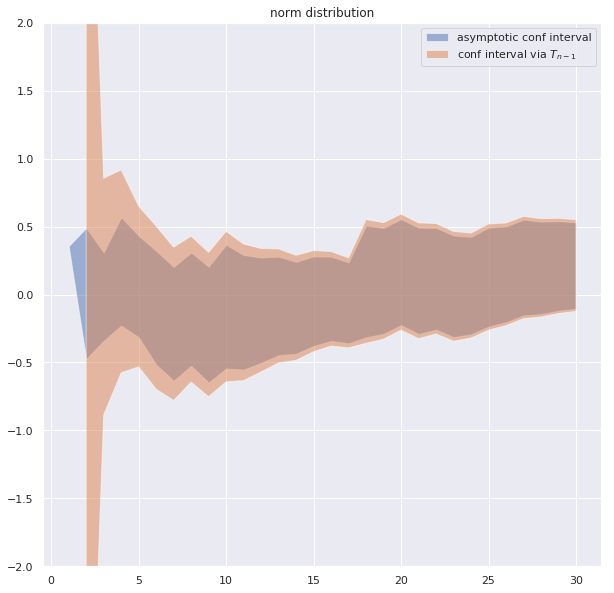

In [60]:
grid = np.arange(1, 31)
sample = sps.norm().rvs(size=30)

cum_mean = sample.cumsum() / grid

vect_asympt = np.vectorize(lambda x:alc_asympt_conf_interval(x),
                            signature='(n)->(2)')

Left1 = []
Right1 = []
Left2 = []
Right2 = []

for i in grid:
    left, right = calc_asympt_conf_interval(sample[:i])
    Left1.append(left)
    Right1.append(right)
    
    left, right = calc_conf_interval(sample[:i])
    Left2.append(left)
    Right2.append(right)
    

    
plt.figure(figsize=(10, 10))


plt.ylim((-2, 2))
plt.title("norm distribution")

plt.fill_between(grid, Left1, Right1, alpha=0.5,
                 label='asymptotic conf interval')
plt.fill_between(grid, Left2, Right2, alpha=0.5,
                 label='conf interval via $T_{n-1}$')

plt.legend()
plt.show()



**Вывод:** Здесь мы можем видеть сравнение точного доверительного интервала, и асимптотич. довер. интервала. Если посмотреть на график, то получается странный результат - асимптотический доверительный интервал получается более узким, чем обычный дов. интервал. Видимо это связано с тем, что у нас неизвестная дисперсия, и мы ее должны оценить 

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина первого типа (за тип вина отвечает первый столбец). 

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

In [116]:
data = pd.read_csv("wine.data")
columns = ["Alcalinity of ash", "Nonflavanoid phenols",
                   "Proanthocyanins", "Hue"]

data = data[data["Class of wine"] == 1]
data = data.loc[:, columns]

In [117]:
array =[]
for column in columns:
    left1, right1 = calc_asympt_conf_interval(data[column])
    left1 = round(left1, 4)
    right1 = round(right1, 4)
    
    left2, right2 = calc_conf_interval(data[column])
    left2 = round(left2, 4)
    right2 = round(right2, 4)
    
    array.append([(left1, right1),(left2, right2)])

df = pd.DataFrame(array, 
                  index=columns,
     columns = ['asympt. conf. interval', 'conf. interval'])   

df

,asympt. conf. interval,conf. interval
Alcalinity of ash,"(16.3931, 17.6815)","(16.3737, 17.7009)"
Nonflavanoid phenols,"(0.2723, 0.3077)","(0.2717, 0.3083)"
Proanthocyanins,"(1.7951, 2.0036)","(1.7919, 2.0067)"
Hue,"(1.0326, 1.0915)","(1.0317, 1.0924)"


Наконец, постройте точную доверительную область для параметров сдвига и масштаба для каждого из рассматриваемых столбцов. Для экономии места стройте графики в два столбца.

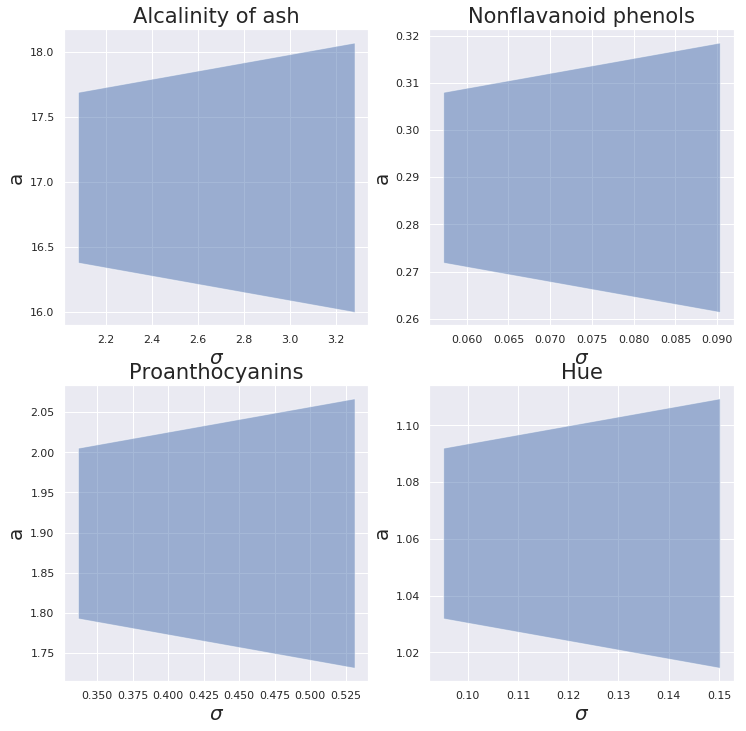

In [124]:
plt.figure(figsize=(12, 12))

for ind, column in enumerate(columns):
    plt.subplot(2,2, ind+1)
    plt.title(column, fontsize=21)
    
    plt.ylabel("a", fontsize=20)
    plt.xlabel(r"$\sigma$", fontsize=20)
    
    sample = data[column]
    
    sigmas, left_a, right_a = confidence_region(sample)
    
    plt.fill_between(sigmas, left_a, right_a, alpha=0.5,
                     label="Область для выборки {}".format(column))

plt.show()    

**Вывод:** Из рисунка и из таблицы видим, что не при всех значений сигма интервалы, показанные в таблице, будут вложены в дов. области, но уже при небольшом сигма они будут внутри этих областей. Видимо, уже на основе этого мы можем судить о значениях сигмы в распределениях для на наших выборок.

________________

## Байесовский подход


__________________
### Задача 6.
 Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, \sigma^2)$, а параметр $\theta$ в качестве априорного распределения имеет стандартное распределение Коши со сдвигом. 

Апостериорное распределение вычисляется по формуле:
$$q\left.(t\,\right|\,x) = \frac {q(t) p_t(x_1) ... p_t(x_n)} {\int\limits_\Theta q(t) p_t(x_1) ... p_t(x_n) dt},$$ 
где $p_t(x)$ --- плотность распределения $\mathcal{N}(t, \sigma^2)$, а $q(t)$ --- плотность распределения Коши.
Как было сказано на лекции, аналитически интеграл в знаменателе посчитать не удастся. Однако, этот интеграл можно вычислить численно, например, с помощью метода Монте-Карло.

В данном случае, интеграл $\int\limits_{\mathbb{R}} f(x) p(x) dx$, где $p(x)$ -- некоторая плотность, можно оценить как  $\frac{1}{k}\sum\limits_{j=1}^k f(\xi_i)$, где $\xi_1, ..., \xi_k$ -- сгенерированная выборка из распределения, имеющего плотность $p(x)$.


Рассмотрим столбец `Alcalinity of ash` датасета <a href="http://archive.ics.uci.edu/ml/datasets/Wine">о вине</a>. 

Для выборки, образованной эти столбцом посчитайте $c$ -- знаменатель в формуле Байеса. Параметры априорного распределения выберите некоторым разумном способом, не опираясь на данные. Какой размер вспомогательной выборки в методе приближенного интегрирования необходим, чтобы с большой точностью посчитать значение $c$?


In [208]:
sigma = 2.7
loc_ash = 20 

ash = data["Alcalinity of ash"]

def func(sample, t):
    n = len(sample)
    e = np.exp(-1/2*((sample-t)**2).sum()/(2.7**2))
    return 1/(2*np.pi*2.7**2)**(n/2)*e

vect_func = np.vectorize(func, signature="(n),()->()")

#функция, по Методу Монте Карло вычисляющая матожидание функции func
def getApproxMonteCarlo(func, sample, k):
    ts = sps.cauchy(loc=loc_ash).rvs(size=k)
    return func(sample, ts).mean()


denominator = getApproxMonteCarlo(vect_func, ash, 100000)

Для апостериорного распределения:
- Нарисуйте график плотности;
- Посчитайте математическое ожидание;
- Найдите симметричный 95%-ый доверительный интервал.

In [209]:
#здесь нашли функцию усл. плотности
ts = np.linspace(15, 25, 1000)

q = sps.cauchy(loc=loc_ash).pdf


condit_q = lambda ts : vect_func(ash, ts)*q(ts)/denominator


In [210]:
#посчитаем матож методом монтекарло для функции p_{t}(x)*t
numen_func = lambda sample, ts: vect_func(sample, ts)*ts

#посчитаем матож без знаменателя
numenator = getApproxMonteCarlo(numen_func, ash, 1000000)


condit_E = numenator/denominator

print("условное матожидание : ", condit_E)

условное матожидание :  17.06690581137273


In [199]:
#посчитаем квантили
alpha = 0.95
eps = 1e-4
#посчитаем кумулятивные суммы по сетке
ts = np.linspace(15, 20, 10000)

qs = condit_q(ts).cumsum()/condit_q(ts).sum()

quantile1 = ts[np.argwhere(np.abs(qs - (1-alpha)/2) < eps).min()]
quantile2 = ts[np.argwhere(np.abs(qs - (1+alpha)/2) < eps).min()]

print("доверительный интервал :", (round(quantile1, 3), 
                                   round(quantile2, 3)))

доверительный интервал : (16.418, 17.811)


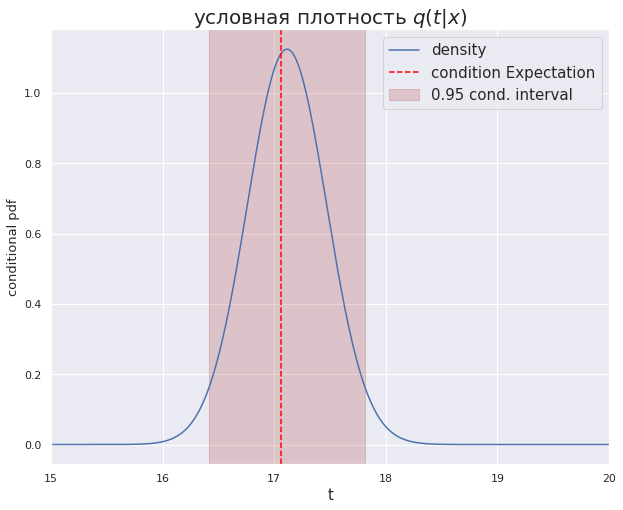

In [207]:
#нарисуем график


plt.figure(figsize=(10, 8))
plt.title("условная плотность $q(t|x)$", fontsize=20)
plt.xlabel("t", fontsize=15)
plt.ylabel("conditional pdf", fontsize=13)

plt.xlim((15, 20))


plt.plot(ts, condit_q(ts), label='density')
plt.axvline(x=condit_E, ls='--',color='red', 
            label='condition Expectation')
plt.axvspan(quantile1, quantile2, color='brown', alpha=0.2,
            label='0.95 cond. interval')

plt.legend(fontsize=15)
plt.show()

**Вывод:** Здесь мы получили апостериорное распределение параметра $\theta$, а также условное матожидание равное $\approx 17.07$ и дов. интервал, равный (16.418, 17.811). Мы можем видеть, что, сравнивая со значениями из предыдущей задачи, байесовский дов. интервал приблизительно такой же, как интервал из задачи 5. Наш матож тоже лежит в дов. интервале из задачи 5. 

Кроме того, мы увидили, что возиться с интегралами было довольно нелегко, поэтому хотелось бы другие методы, которые не потребовали большой вычислительной сложности.

__________________
### Задача 7.
 Рассмотрим схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха $p$. 

Постройте несколько графиков сопряженного распределения для разных параметров и охарактеризуйте, как его значения параметров соотносятся с априорными знаниями о монете.
Это могут быть, например, знания вида 
* монета скорее честная (при таком априорном распределении наиболее вероятны значения $p$ в окрестности 0.5);
* монета скорее нечестная, перевес неизвестен (наименее вероятны значения $p$ в окрестности 0.5);
* монета скорее нечестная, перевес в сторону герба (наиболее вероятны значения $p$ в окрестности 1);
* монета скорее честная, либо с небольшим перекосом вправо (наиболее вероятны значения $p$ в окрестности ~0.6);
* ничего не известно (все значения равновероятны).

Для каждого случая из перечисленных выше постройте график плотности сопряженного распределения (на одной фигуре).

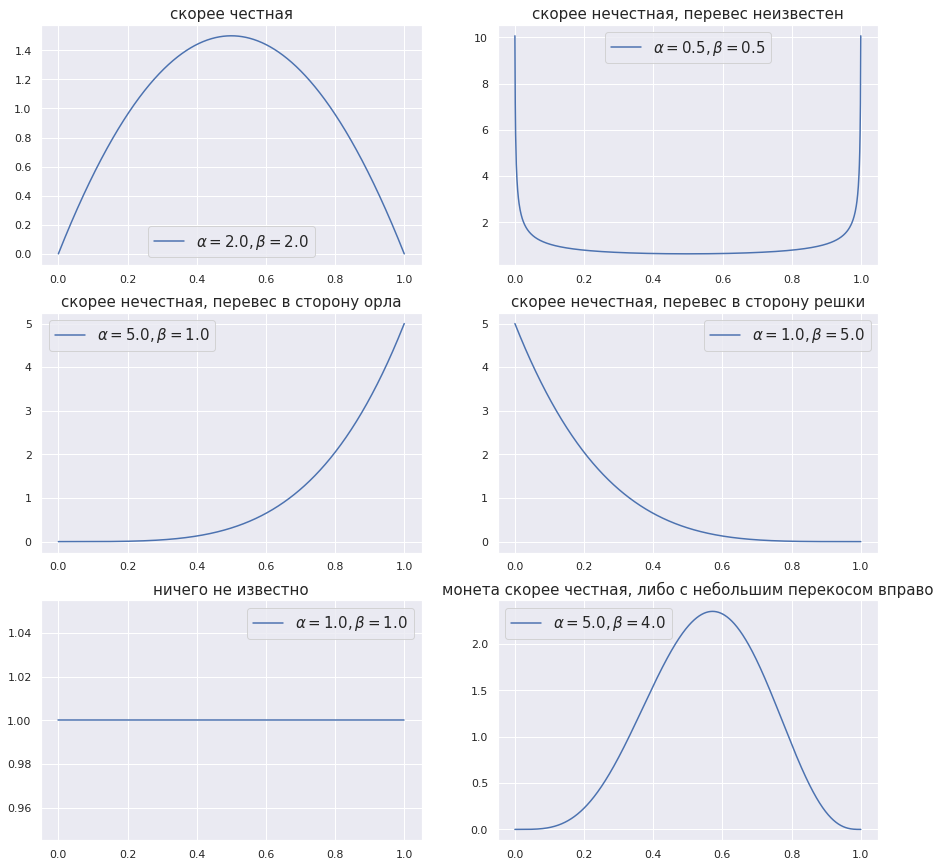

In [326]:
grid= np.linspace(0, 1, 1000)

indices = np.arange(1, 7)
alphas = [2, 0.5, 5, 1, 1, 5]
betas = [2, 0.5, 1, 5, 1, 4]
titles = ["скорее честная",
          "скорее нечестная, перевес неизвестен",
          "скорее нечестная, перевес в сторону орла",
          "скорее нечестная, перевес в сторону решки",
           "ничего не известно",
          "монета скорее честная, либо с небольшим перекосом вправо"]


plt.figure(figsize=(15, 15))

for i, alpha, beta, title in zip(indices, alphas, betas, titles):
    plt.subplot(3, 2, i)
    plt.title(title, fontsize=15)
    plt.plot(grid, sps.beta(a=alpha, b=beta).pdf(grid), 
             label = r"$\alpha = %.1f, \beta = %.1f$" % (alpha, beta))
    plt.legend(fontsize=15)
plt.show()

**Вывод:** На примере этих графиков мы видим, что с помощью Бета распределения мы можем довольно хорошо описать различные априорные знания о монетке. Мы можем легко подобрать параметры распределения так, чтобы данное априорное распределение хорошо описывало наши предварительные знания о монетке.

Ниже приведена реализация некоторых вспомогательных функций.

In [403]:
def draw_posteriori(grid, distr_class, post_params, ind,
                    title=None, xlim=None):
    ''' Рисует серию графиков апостериорных плотностей.
        grid --- сетка для построения графика
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    
    size = post_params.shape[0] - 1
    
    plt.subplot(4, 2, ind)
    plt.title(title)
    for n in range(size+1):
        plt.plot(grid, 
                 distr_class(post_params[n]).pdf(grid) \
                     if np.isscalar(post_params[n]) \
                     else distr_class(*post_params[n]).pdf(grid), 
                 label='n=%d: (%.2f,%.2f)' % (n, post_params[n][0], 
                                              post_params[n][-1]), 
                 lw=2.5,
                 color=(1-n/size, n/size, 0))
    plt.grid(ls=':')
    plt.legend(loc=2)
    plt.xlim(xlim)

    
def draw_estimations(ml, distr_class, post_params, ind, 
                     title=None, confint=True, ylim=None):
    ''' Рисует графики байесовской оценки (м.о. и дов. инт.) и ОМП.
        ml --- Оценка максимального правдоподобия для 1 <= n <= len(sample)
        distr_class --- класс распределений из scipy.stats
        post_params --- параметры апостериорных распределений 
                        shape=(размер выборки, кол-во параметров)
    '''
    
    size = len(ml)
    distrs = []
    for n in range(size+1): 
        distrs.append(distr_class(post_params[n]) \
                          if np.isscalar(post_params[n]) \
                          else distr_class(*post_params[n]))
    
    plt.subplot(4, 2, ind)
    plt.title(title)
    plt.plot(np.arange(size+1), [d.mean() for d in distrs], 
             label='Bayes', lw=1.5)
    plt.fill_between(np.arange(size+1), [d.ppf(0.975) for d in distrs], 
                     [d.ppf(0.025) for d in distrs], alpha=0.1)
    plt.plot(np.arange(size)+1, ml, label='MLE', lw=1.5)
    plt.grid(ls=':')
    plt.ylim(ylim)
    plt.legend(loc=2)

Реализуйте следующую функцию

In [364]:
def bern_posterior_params(sample, a, b):
    ''' Возвращает параметры апостериорного распределения 
        для всех 0 <= n <= len(sample).
        a, b --- параметры априорного распределения.
    '''
    
    grid = np.arange(len(sample) + 1)
    summ = np.zeros(shape=len(sample) + 1)
    summ[1:] = sample.cumsum()
    alphas = a + summ
    betas = b + grid - summ
    
    params = np.dstack((alphas, betas))
    return params[0]

Проведите по 15 бросков симметричной и несимметричной монет (можно сгенерировать) и рассмотрите для каждой из них два случая --- параметры априорного распределения подобраны правильно или неправильно.
Постройте графики, воспользовавшись функциями `draw_posteriori` и `draw_estimations`.

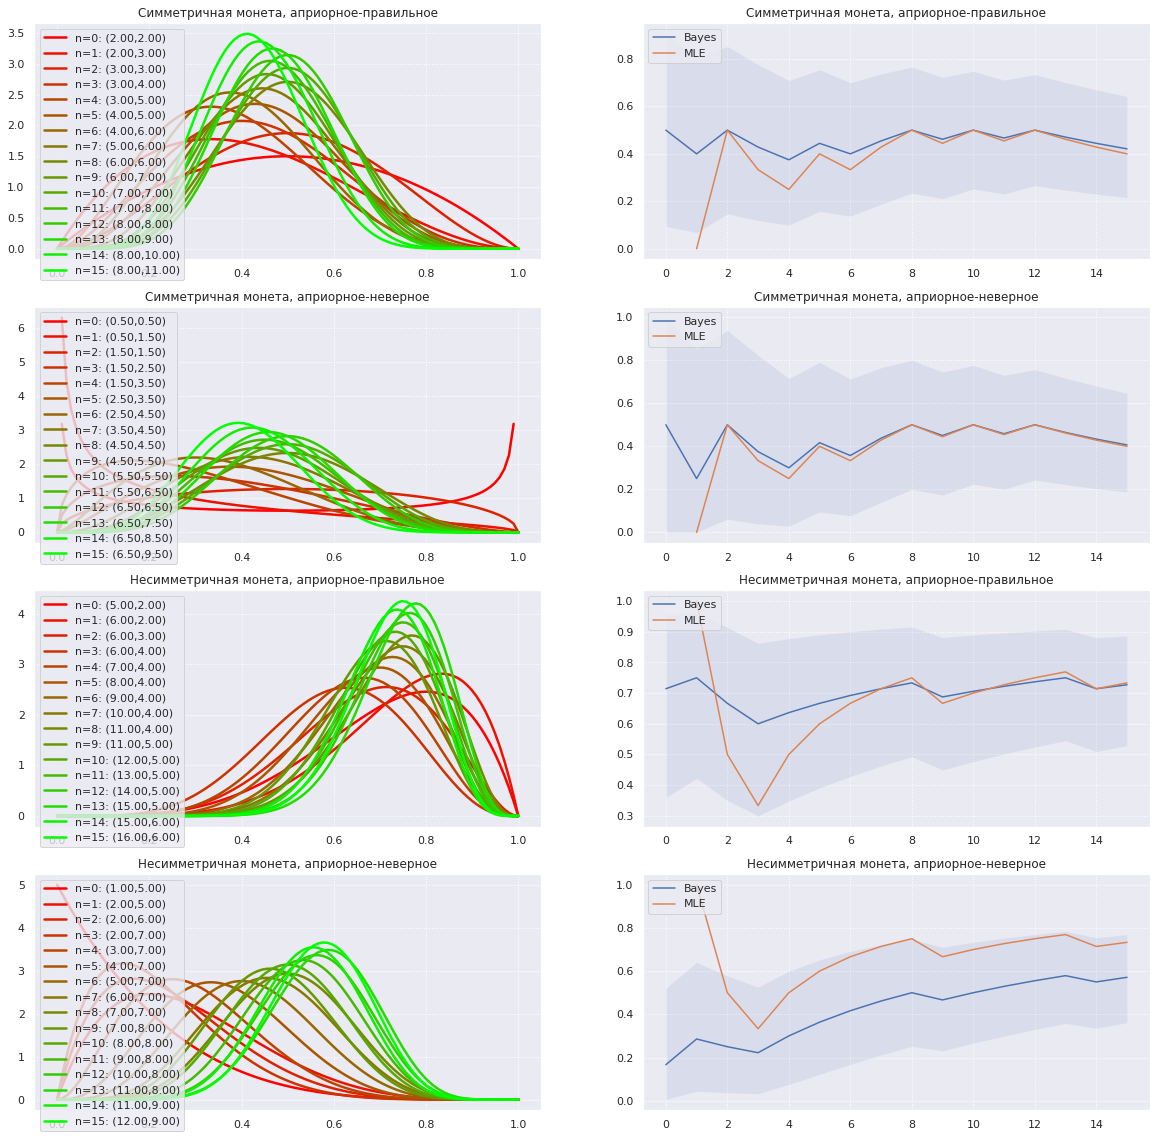

In [385]:

def get_graphics(func, grid, distr_class, coins, a, b, ind,title):
    draw_posteriori(grid, distr_class, 
                   func(coins, a, b),ind,
                   title = title)

    ml = coins.cumsum()/np.arange(1, len(coins) + 1)
    draw_estimations(ml, distr_class,
                   func(coins, a, b),ind + 1, 
                   title = title)


#генерим выборки
grid = np.linspace(0, 1, 100)

symm_coins = sps.bernoulli(0.5).rvs(15)

asym_coins = sps.bernoulli(0.8).rvs(15)

plt.figure(figsize=(20, 20))

get_graphics(bern_posterior_params, grid, sps.beta, symm_coins, 2, 2, 1,
             'Симметричная монета, априорное-правильное') 

get_graphics(bern_posterior_params, grid, sps.beta, symm_coins, 0.5, 0.5, 3,
             'Симметричная монета, априорное-неверное')
get_graphics(bern_posterior_params, grid, sps.beta, asym_coins, 5, 2, 5, 
            'Несимметричная монета, априорное-правильное')
get_graphics(bern_posterior_params, grid, sps.beta, asym_coins, 1, 5, 7,
            'Несимметричная монета, априорное-неверное')

plt.show()

Сделайте вывод. Что можно сказать про зависимость от параметров априорного распределения? Сравните байесовские оценки с оценкой максимального правдоподобия.

**Вывод:** Зависимость от параметров априорного распределения конечно есть, но даже если мы выбираем их изначально в корне неправильно, апостериорное распределение с ростом выборки все равно стремится к распределению с более правильными параметрами, хотя стоит отметить, что в нашем случае для выборки из 15 элементов распределение иногда не успевает как следует приблизится к правильным параметрам. 

Байесовские оценки конечно также очень зависят от параметра априорного распределения, и при выборе правильных параметров априорного распределения, мы видим, как хорошо условное Мат.Ожидание и Дов.Интервал описывают истинный параметр распределения бернулли. Мы видим, что в таких случаях оценки MLE  и байесовские точенчные оценки довольно быстро начинают сходится к очень близким значениям. Можно даже отметить, что зачастую в случае правильно выбранных параметров байесовская оценка сходится даже быстрее чем MLE.

Но даже при выборе неправильных (даже полностью противоположных истинным) параметров, байесовские оценки, пусть и медленней, чем при выборе правильных параметров, при росте выборки стремится к тому же значению, что и MLE, хотя MLE сходится к правильному значению быстрее. На этапе выборки из 15 элементов, MLE иногда даже не попадает в байесовский Доверительный Интервал. Поэтому можно сказать, что выборка из 15 элементов, по крайней мере для данного опыта с монетой, слишком мала, чтобы с помощью Байесовского метода сказать какие то хорошие результаты. 

__________________
### Задача 8.
 
Один экзаменатор на экзамене по математической статистике при выставлении оценки студенту пользуется следующей схемой. В течении экзамена экзаменатор задает студенту некоторое количество вопросов, получая тем самым выборку $X_1, ..., X_n \sim Bern(p)$ --- индикаторы того, что студент на вопрос ответил правильно.
При этом сначала он подбирает некоторое априорное распределение на основе его знаний о студенте к моменту начала ответа. После каждого ответа студента экзаменатор вычисляет апостериорное распределение и строит байесовский доверительный интервал для $p$ уровня доверия 0.95. Если после очередного ответа студента доверительный интервал содержит лишь одно число $i/10$, где $i \in \{0, ..., 10\}$, то экзаменатор выставляет студенту оценку $i+1$.

Ответьте на следующие вопросы:
* Квантили какого уровня нужно выбирать экзаменатору при построении доверительного интервала, чтобы задавать студенту как можно меньше вопросов? Какие оценки будет выставлять экзаменатор в таком случае?
* Как зависит оценка студента и среднее количество заданных вопросов у различных студентов (по уровню знаний) при различных априорных представлений экзаметора?
* Нужно ли дружить с таким экзаменатором?

In [358]:
#условие окончания экзамена
def isOver(q1, q2):
    if ((q2 - q1) < 0.1):
        for i in range(11):
            if (q1 <= i/10 <= q2):
                return i + 1
    return -1


def getMark(p, a, b):
    """
    p- параметр бернуллиевского распределения, по
        которому строится выборка    
    a, b - параметры априорного распеделения
    """
    params = [(a, b)]
    sample = list()
    q1 = 0
    q2 = 1
    
    mark = -1
    
    while (mark == -1):
        coin = sps.bernoulli(p).rvs()
        sample.append(coin)
        
        params.append((params[-1][0] + coin, 
                       params[-1][1] + 1 - coin))
        
        q1 = sps.beta(*params[-1]).ppf(0.025)
        q2 = sps.beta(*params[-1]).ppf(0.975)
        
        mark = isOver(q1, q2)
    return  (mark, len(sample))  
        
    
getMark(0.8, 1, 1)        

(9, 225)

**Вывод:** Слишком много вопросов задает экзаментаор, но оценки ставит на одну больше чем в среднем, что хорошо)

__________________
### Задача 9.
 Проведите исследование, аналогичное задаче 7 для выборок из распределений
* $\mathcal{N}(\theta, 1)$
* $Exp(\theta)$

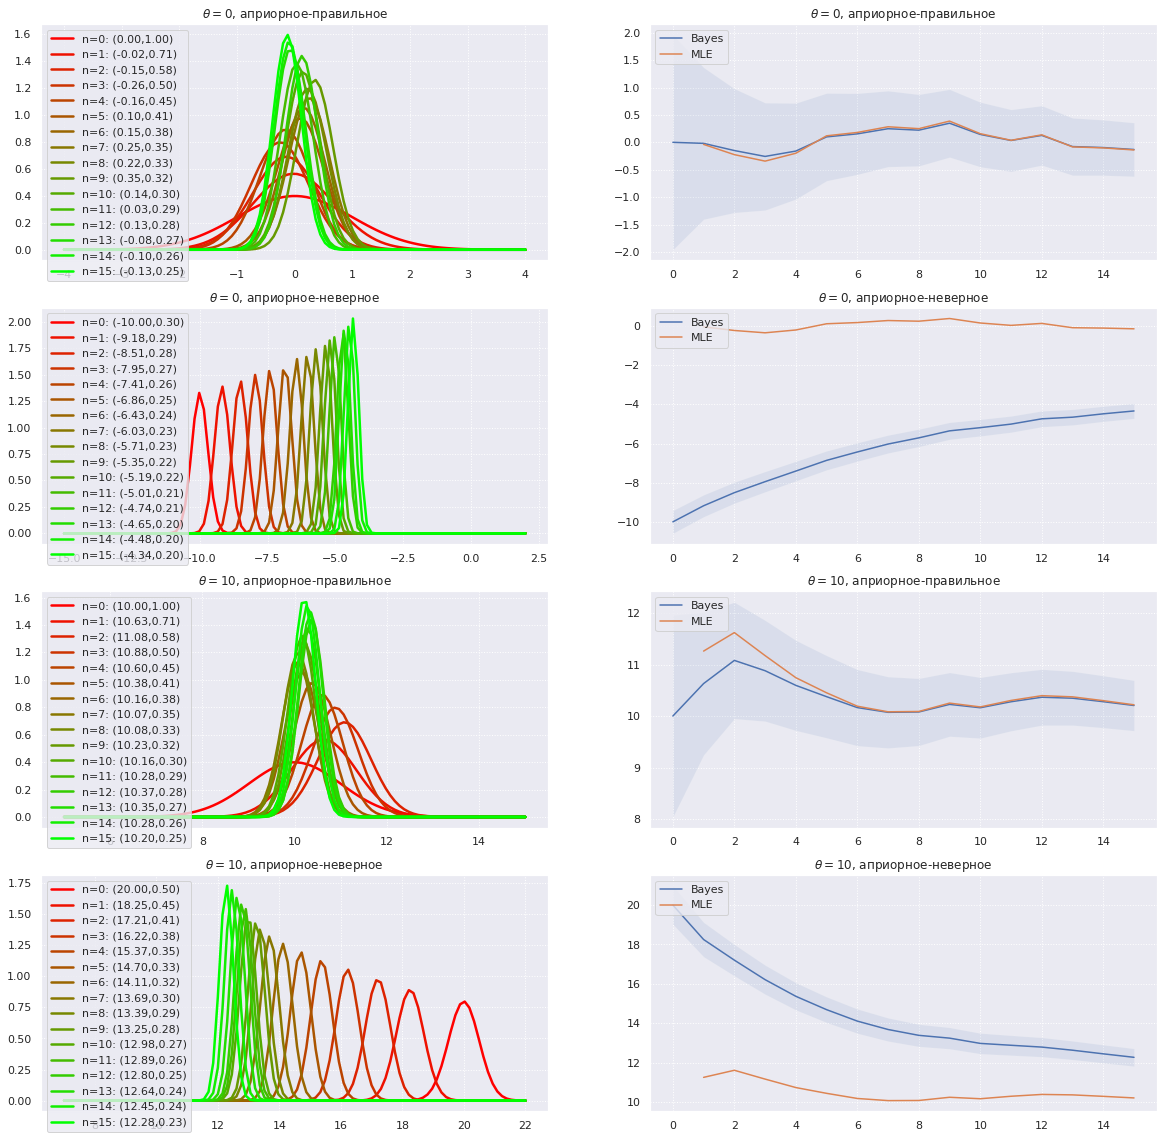

In [395]:
#для нормального распределения

def normal_posterior_params(sample, a, sigma):
    new_sample = np.zeros(len(sample) + 1)
    new_sample[1:] = sample.cumsum()
    grid = np.arange(len(sample) + 1)
    
    mu = (a/sigma**2 + new_sample)/(1/sigma**2 + grid)
    
    sigmas = 1/np.sqrt(1/sigma**2 + grid)
    
    params = np.dstack((mu, sigmas))
    return params[0]



#генерим выборки
sample1 = sps.norm().rvs(15)

sample2 = sps.norm(loc=10, scale=1).rvs(15)

plt.figure(figsize=(20, 20))

get_graphics(normal_posterior_params, np.linspace(-4, 4, 100),
             sps.norm, sample1, 0, 1, 1,
             r'$\theta = 0$, априорное-правильное') 

get_graphics(normal_posterior_params, np.linspace(-15, 2, 100), 
            sps.norm, sample1, -10, 0.3, 3,
             r'$\theta = 0$, априорное-неверное')
get_graphics(normal_posterior_params, np.linspace(5, 15, 100),
             sps.norm, sample2, 10, 1, 5, 
            r'$\theta = 10$, априорное-правильное')
get_graphics(normal_posterior_params, np.linspace(7, 22, 100),
             sps.norm, sample2, 20, 0.5, 7,
            r'$\theta = 10$, априорное-неверное')

plt.show()

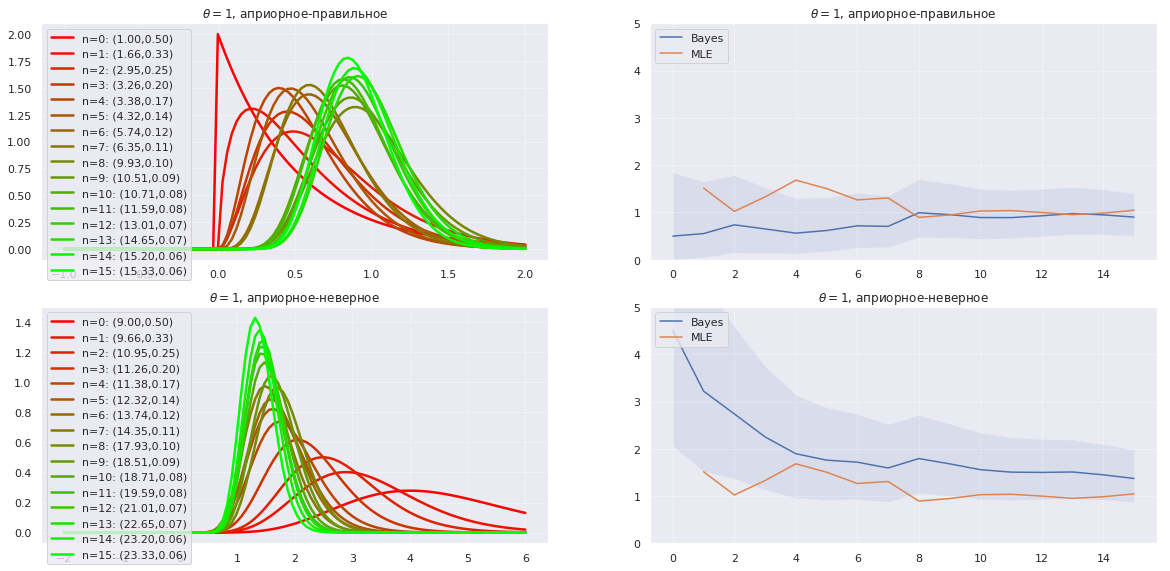

In [462]:
# для Exp(theta)

def expon_posterior_params(sample, a, b):
    new_sample = np.zeros(len(sample) + 1)
    new_sample[1:] = sample.cumsum()
    grid = np.arange(len(sample) + 1)
    
    mu = a + grid
    
    bs = b + new_sample
    
    zer = np.zeros(len(sample) + 1)
    
    params = np.dstack((bs, zer, 1/mu))
    return params[0]


def get_exp_graphics(grid, coins, a, b, ind,title):
    draw_posteriori(grid, sps.gamma, 
                   expon_posterior_params(coins, a, b),ind,
                   title = title)

    ml = coins.cumsum()/np.arange(1, len(coins) + 1)
    draw_estimations(1/ml, sps.gamma,
                   expon_posterior_params(coins, a, b),ind + 1, 
                   title = title, ylim=(0, 5))
    

#генерим выборки

sample1 = sps.expon(scale=1).rvs(15)

plt.figure(figsize=(20, 20))

get_exp_graphics(np.linspace(-1, 2, 100), sample1, 2, 1, 1,
             r'$\theta = 1$, априорное-правильное') 

get_exp_graphics(np.linspace(-2, 6, 100), sample1, 2, 9, 3,
             r'$\theta = 1$, априорное-неверное')


plt.show()    

**Вывод:** Мы видим, что при исследовании $\mathcal{N}(\theta, 1)$, и $Exp(\theta)$ наблюдаются приблизительно такие же выводы, как и в задаче 7. Но также можно сказать, что при анализе нормального распределения, очень легко подобрать "слишком плохие" параметры сопряженного априорного распределения, и таким образом сходимость байесовских оценок будет очень медленной, а байесовский доверительный интервал будет узким, и даже при относительно больших размеров выборки непригоден. Это будет происходить, если брать слишком маленькую дисперсию у сопряженного априорного распределения, и параметр $\theta$, сильно отличающейся от истинного матожидания.

В анализировании $Exp(\theta)$ можно подобрать плохие параметры приблизительно похожим образом - чтобы "бугор" сопряженного был далеко от истинного "бугра", и причем был довольно высоким. 